# Data Analysis for NIH ChestX-ray14 Dataset

## Overview
This notebook provides exploratory data analysis (EDA) for the NIH ChestX-ray14 dataset used in the CausalXray project. The analysis includes dataset composition, class distribution, and confounder exploration.

In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydicom
from pathlib import Path
import os

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Dataset Metadata

In [9]:
# Load dataset metadata
metadata_path = '../data/nih_chestxray14/Data_Entry_2017.csv'
metadata = pd.read_csv(metadata_path)
metadata.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


## Dataset Composition Analysis

In [10]:
# Basic dataset statistics
print(f"Total images: {len(metadata)}")
print(f"Unique patients: {metadata['Patient ID'].nunique()}")
print(f"Time span: {metadata['Patient Age'].min()} to {metadata['Patient Age'].max()} years")

# View label distribution
label_counts = metadata['Finding Labels'].value_counts()
label_counts.head(10)

Total images: 112120
Unique patients: 30805
Time span: 1 to 414 years


Finding Labels
No Finding                  60361
Infiltration                 9547
Atelectasis                  4215
Effusion                     3955
Nodule                       2705
Pneumothorax                 2194
Mass                         2139
Effusion|Infiltration        1603
Atelectasis|Infiltration     1350
Consolidation                1310
Name: count, dtype: int64

## Class Distribution

C:\Users\JIMIT\AppData\Local\Temp\ipykernel_25944\3553117399.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pathology_freq.head(15).values, y=pathology_freq.head(15).index, palette='viridis')


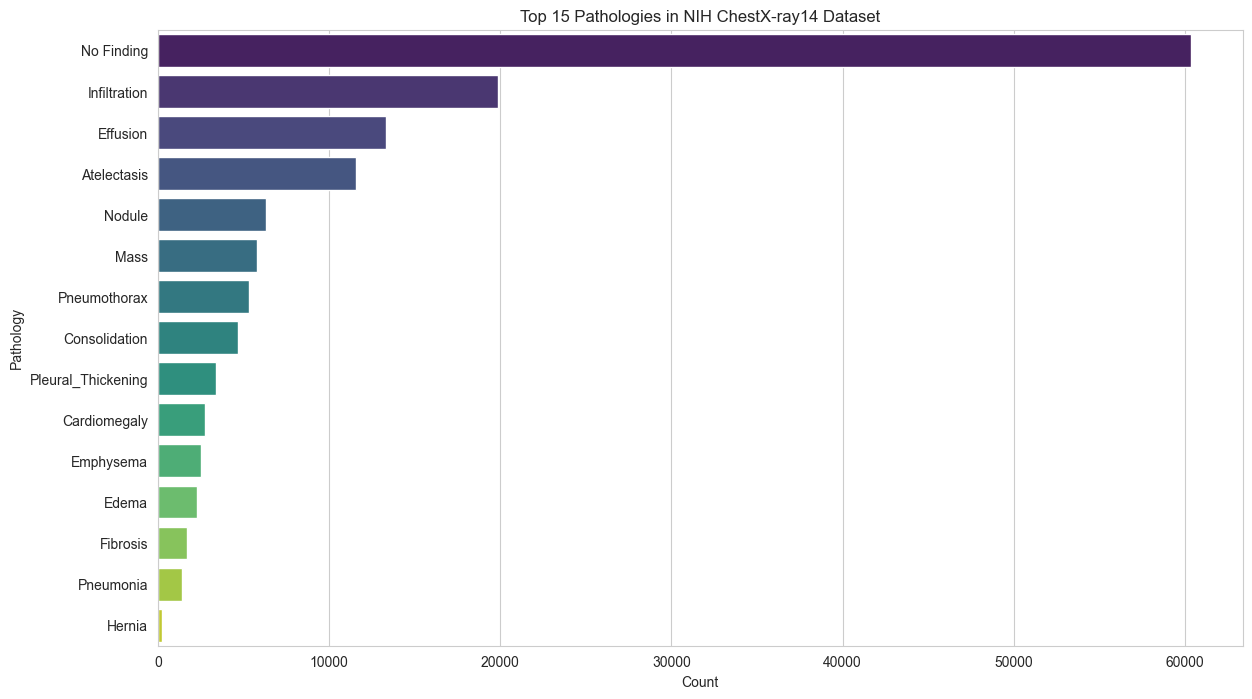

Pneumonia cases: 1431 (1.28%)


In [11]:
# Analyze distribution of pathologies
# Split multi-label findings into individual columns
all_labels = set()
for labels in metadata['Finding Labels']:
    all_labels.update(labels.split('|'))

# Create binary matrix for each pathology
for label in all_labels:
    metadata[label] = metadata['Finding Labels'].apply(lambda x: 1 if label in x else 0)

# Calculate pathology frequencies
pathology_freq = metadata[list(all_labels)].sum().sort_values(ascending=False)

# Visualize top 15 pathologies
plt.figure(figsize=(14, 8))
sns.barplot(x=pathology_freq.head(15).values, y=pathology_freq.head(15).index, palette='viridis')
plt.title('Top 15 Pathologies in NIH ChestX-ray14 Dataset')
plt.xlabel('Count')
plt.ylabel('Pathology')
plt.show()

# Pneumonia-specific analysis
pneumonia_df = metadata[metadata['Pneumonia'] == 1]
print(f"Pneumonia cases: {len(pneumonia_df)} ({len(pneumonia_df)/len(metadata)*100:.2f}%)")

## Confounder Analysis

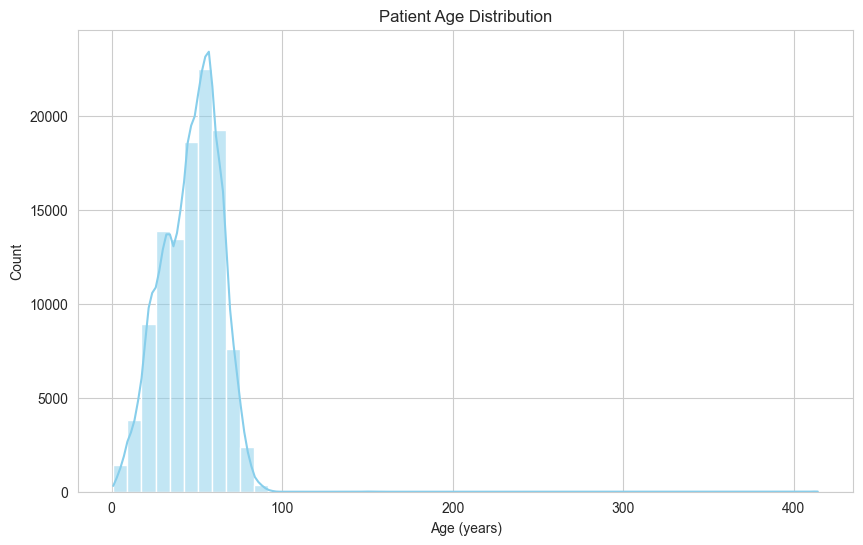

C:\Users\JIMIT\AppData\Local\Temp\ipykernel_25944\164652797.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')


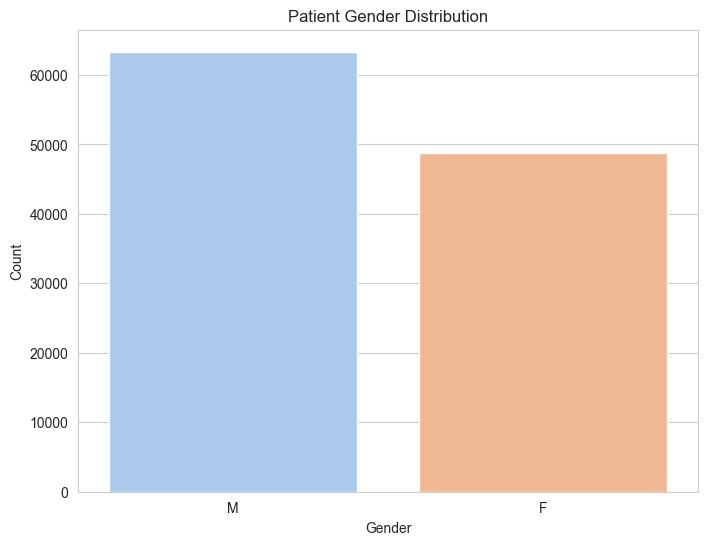

C:\Users\JIMIT\AppData\Local\Temp\ipykernel_25944\164652797.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_counts.index, y=position_counts.values, palette='Set2')


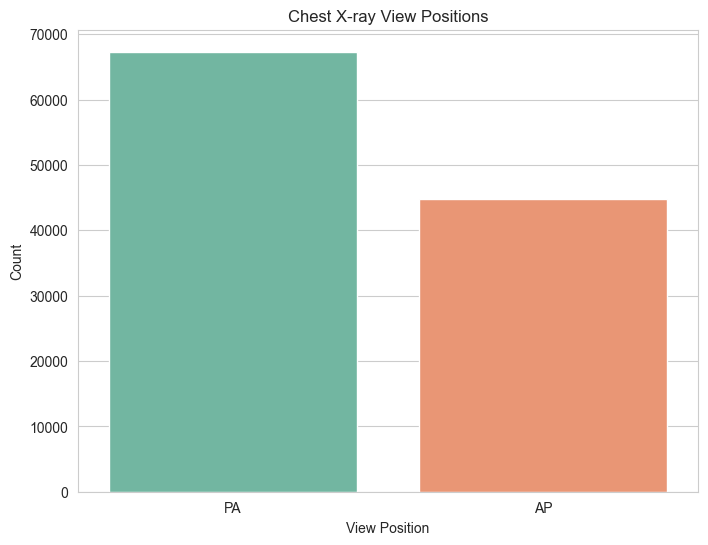

In [12]:
# Patient Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(metadata['Patient Age'], bins=50, kde=True, color='skyblue')
plt.title('Patient Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

# Gender Distribution
gender_counts = metadata['Patient Gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel')
plt.title('Patient Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# View Position Distribution
position_counts = metadata['View Position'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=position_counts.index, y=position_counts.values, palette='Set2')
plt.title('Chest X-ray View Positions')
plt.xlabel('View Position')
plt.ylabel('Count')
plt.show()

## Image Analysis

FileNotFoundError: Image file not found at ../data/nih_chestxray14/images/00019515_002.png. Please check the path.

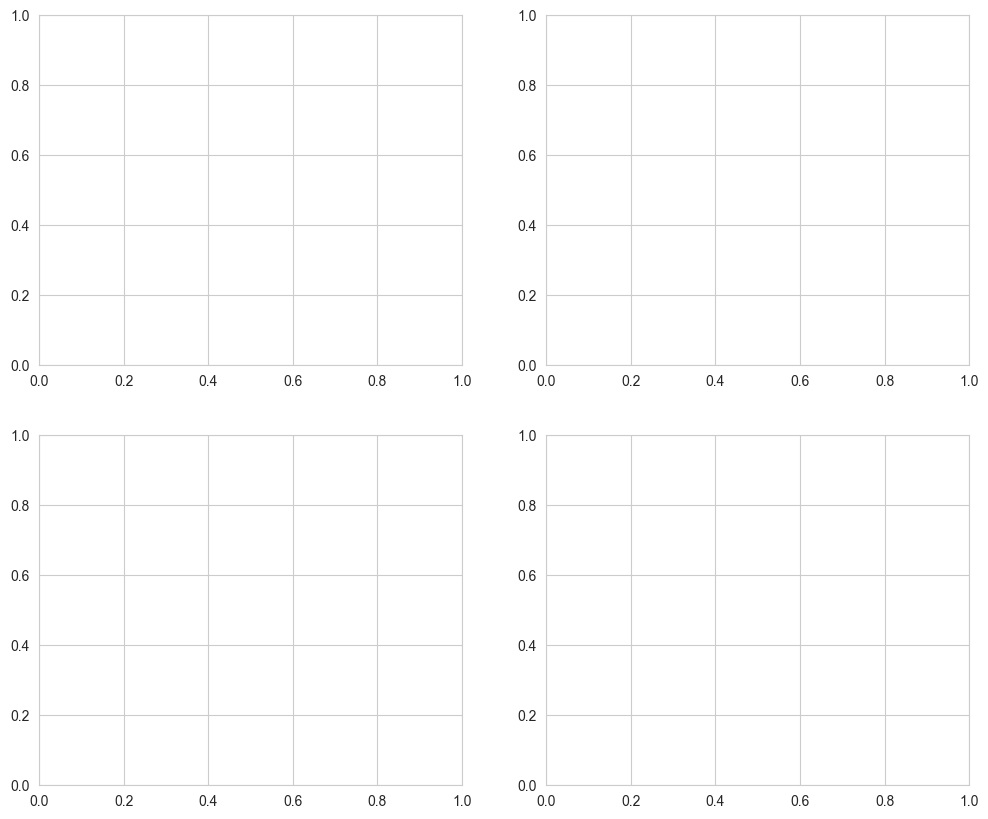

In [14]:
# Sample image visualization
import matplotlib.image as mpimg

def load_png_image(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"Image file not found at {path}. Please check the path.")
    return mpimg.imread(path)

# Display sample images with different pathologies
sample_images = metadata.sample(4)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, (idx, row) in enumerate(sample_images.iterrows()):
    img_path = f"../data/nih_chestxray14/images/{row['Image Index']}"
    img = load_png_image(img_path)
    ax = axes[i//2, i%2]
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Findings: {row['Finding Labels']}\nAge: {row['Patient Age']}, Gender: {row['Patient Gender']}")
    ax.axis('off')

plt.tight_layout()
plt.show()

## Correlation Analysis

In [ ]:
# Correlation between different pathologies
correlation_matrix = metadata[list(all_labels)].corr()

# Visualize correlation heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Thoracic Pathologies')
plt.show()

# Pneumonia correlation analysis
pneumonia_corr = correlation_matrix['Pneumonia'].sort_values(ascending=False)[1:11]

plt.figure(figsize=(10, 6))
sns.barplot(x=pneumonia_corr.values, y=pneumonia_corr.index, palette='rocket')
plt.title('Top 10 Pathologies Correlated with Pneumonia')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Pathology')
plt.show()

## Dataset Splitting Analysis

In [ ]:
# Check train/test split distribution
train_list = pd.read_csv('../data/nih_chestxray14/train_val_list.txt', header=None, names=['Image Index'])
test_list = pd.read_csv('../data/nih_chestxray14/test_list.txt', header=None, names=['Image Index'])

metadata['Split'] = 'Train'
metadata.loc[metadata['Image Index'].isin(test_list['Image Index']), 'Split'] = 'Test'

# Visualize split distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Split', data=metadata, palette='Set3')
plt.title('Dataset Split Distribution')
plt.ylabel('Count')
plt.show()

# Pneumonia distribution across splits
pneumonia_split = metadata.groupby('Split')['Pneumonia'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Split', y='Pneumonia', data=pneumonia_split, palette='Set3')
plt.title('Pneumonia Prevalence by Dataset Split')
plt.ylabel('Proportion with Pneumonia')
plt.show()

## Summary
This exploratory analysis provides insights into dataset composition and potential confounders relevant for causal modeling in CausalXray. Key findings:

1. **Class Imbalance**: Pneumonia represents only ~1.3% of cases, requiring specialized handling
2. **Confounders**: Significant variations in age, gender, and view position distributions
3. **Pathology Correlations**: Pneumonia shows strongest correlations with Infiltration and Consolidation
4. **Data Splits**: Balanced pneumonia distribution between train/test splits

These insights will inform preprocessing strategies and causal graph design for the CausalXray framework development.